In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

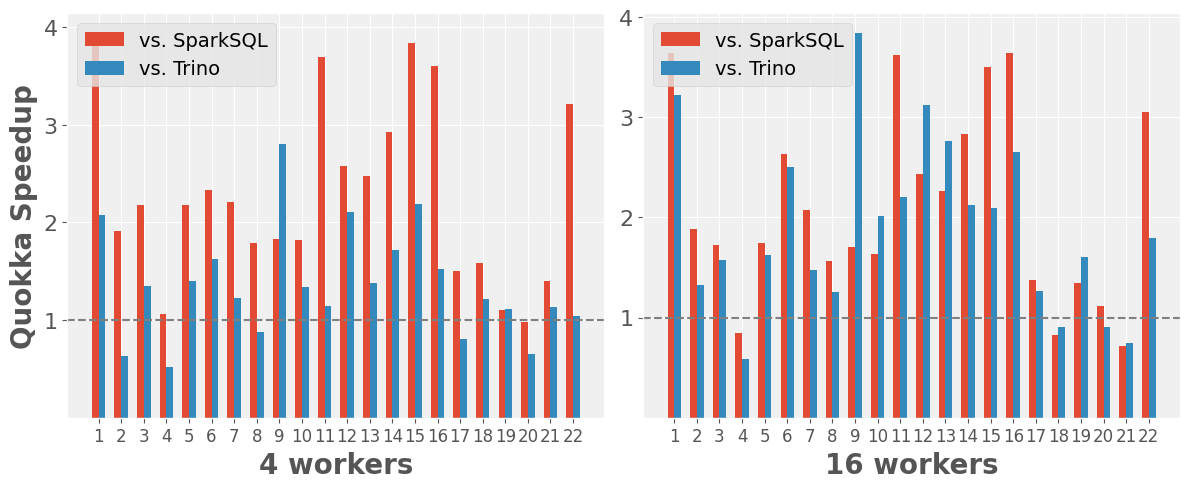

In [107]:
data = pd.read_csv("trino-spark-quokka.csv")

# Data
labels = data['TPC-H']
series1 = data['QuokkavsSpark4']
series2 = data['QuokkavsTrino4']
series3 = data['QuokkavsSpark16']
series4 = data['QuokkavsTrino16']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_facecolor('#f0f0f0')
axs[1].set_facecolor('#f0f0f0')


# Left subplot with series1 and series2
axs[0].bar(x - width/2, series1, width, label='vs. SparkSQL')
axs[0].bar(x + width/2, series2, width, label='vs. Trino')
axs[0].set_ylabel('Quokka Speedup',weight = 'bold', size= 20)
axs[0].set_xlabel('4 workers',weight = 'bold', size= 20)
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, size=12)
axs[0].legend(fontsize=14)
axs[0].tick_params(axis='y', labelsize=16)
axs[0].set_yticks([1, 2, 3, 4])
axs[0].axhline(y=1, color='gray', linestyle='--')  # Horizontal dashed line


# Right subplot with series3 and series4
axs[1].bar(x - width/2, series3, width, label='vs. SparkSQL')
axs[1].bar(x + width/2, series4, width, label='vs. Trino')
# axs[1].set_ylabel('Quokka Speedup')
axs[1].set_xlabel('16 workers',weight = 'bold', size= 20)
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, size=12)
axs[1].legend(fontsize=14)
axs[1].tick_params(axis='y', labelsize=16)
axs[1].set_yticks([1, 2, 3, 4])
axs[1].axhline(y=1, color='gray', linestyle='--')  # Horizontal dashed line


fig.tight_layout()
# plt.show()

plt.savefig('speedups.pdf')  

In [2]:
from scipy.stats import gmean
a = pd.read_csv("trino-results.csv",delimiter='\t')
gmean((a['FT-16-mean'] / a['NonFT-16-mean']))

2.7446512158451797

/tmp/ipykernel_3942476/464192847.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(a['TPC-H'], rotation=60,weight = 'bold', size=16)
/tmp/ipykernel_3942476/464192847.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(a['TPC-H'], rotation=60,weight = 'bold', size=16)


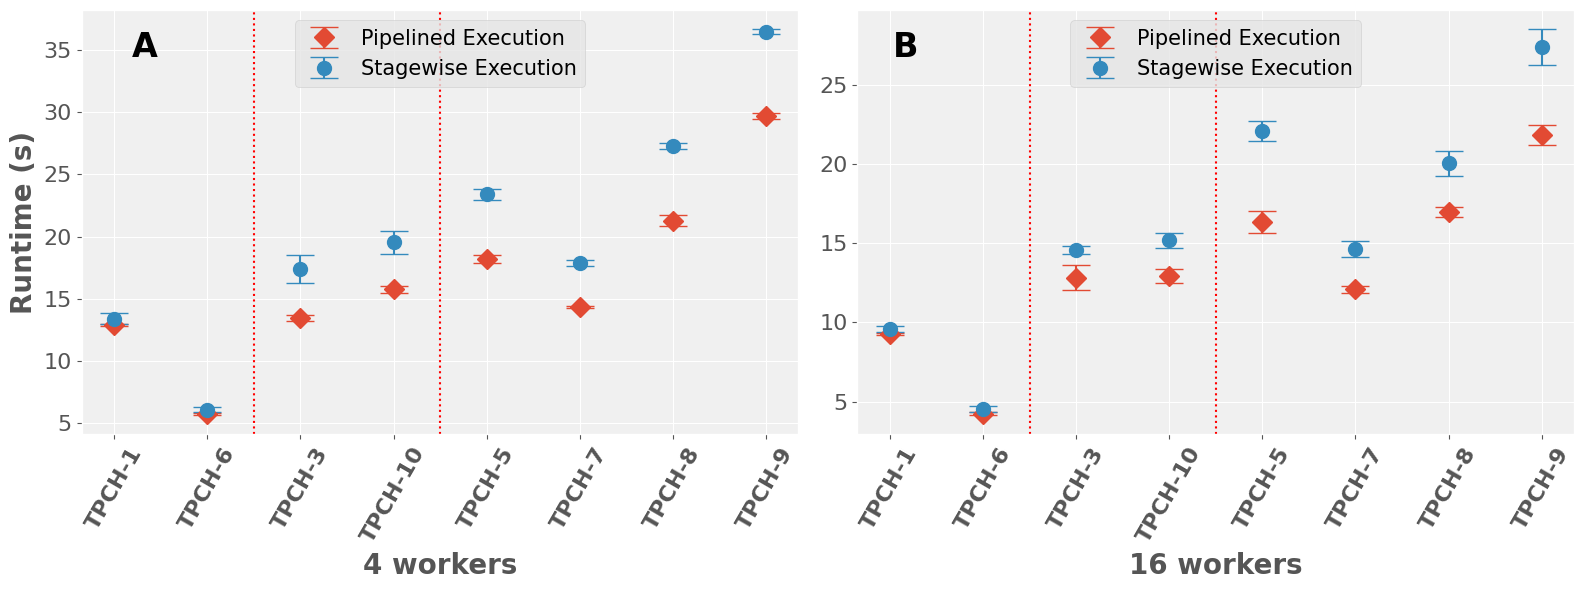

In [105]:
a = pd.read_csv("4.csv").iloc[[0,3,1,7,2,4,5,6]]
labels = a.query
from matplotlib.ticker import MultipleLocator

width = 0.25  # the width of the bars

fig, axes = plt.subplots(1,2, figsize=(16,6))
ax = axes[0]
ax.plot()
rects1 = ax.errorbar(x = a['TPC-H'], y = a['dynamic'], yerr = a["dynamic-std"], label = "Pipelined Execution", fmt="D", markersize=10, capsize=10)
rects2 = ax.errorbar(x = a['TPC-H'], y = a['blocking'], yerr = a['blocking-std'], label = "Stagewise Execution", fmt="o",markersize=10,  capsize=10)

ax.set_ylabel('Runtime (s)', weight = 'bold', size= 20)
ax.legend(loc = 'upper center',fontsize=15)
ax.set_xticklabels(a['TPC-H'], rotation=60,weight = 'bold', size=16)
ax.set_xlabel("4 workers",weight = 'bold', size= 20)
# ax.set_xlim(0, 11)
ax.set_facecolor('#f0f0f0')
ax.text(0.07, 0.95, 'A', transform=ax.transAxes, fontsize=24, fontweight='bold', va='top')
ax.tick_params(axis='y', labelsize=16)
ax.axvline(x=1.5, color='red', linestyle=':')
ax.axvline(x=3.5, color='red', linestyle=':')

a = pd.read_csv("16.csv").iloc[[0,3,1,7,2,4,5,6]]
labels = a.query
ax = axes[1]
ax.plot()
rects1 = ax.errorbar(x = a['TPC-H'], y = a['dynamic'], yerr = a["dynamic-std"], label = "Pipelined Execution", fmt="D",markersize=10,  capsize=10)
rects2 = ax.errorbar(x = a['TPC-H'], y = a['blocking'], yerr = a['blocking-std'], label = "Stagewise Execution", fmt="o",markersize=10,  capsize=10)

ax.legend(loc = 'upper center',fontsize=15)
ax.tick_params(axis='y', labelsize=16)
ax.text(0.05, 0.95, 'B', transform=ax.transAxes, fontsize=24, fontweight='bold', va='top')

ax.set_xticklabels(a['TPC-H'], rotation=60,weight = 'bold', size=16)
ax.set_xlabel("16 workers",weight = 'bold', size= 20)
# ax.set_xlim(0,11)
ax.set_facecolor('#f0f0f0')
ax.axvline(x=1.5, color='red', linestyle=':')
ax.axvline(x=3.5, color='red', linestyle=':')

fig.tight_layout()

#plt.show()
plt.savefig('blocking-vs-dynamic.pdf')  

/tmp/ipykernel_3942476/2827813185.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(a['TPC-H'], rotation=60,weight = 'bold', size=16)
/tmp/ipykernel_3942476/2827813185.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(a['TPC-H'], rotation=60,weight = 'bold', size=16)


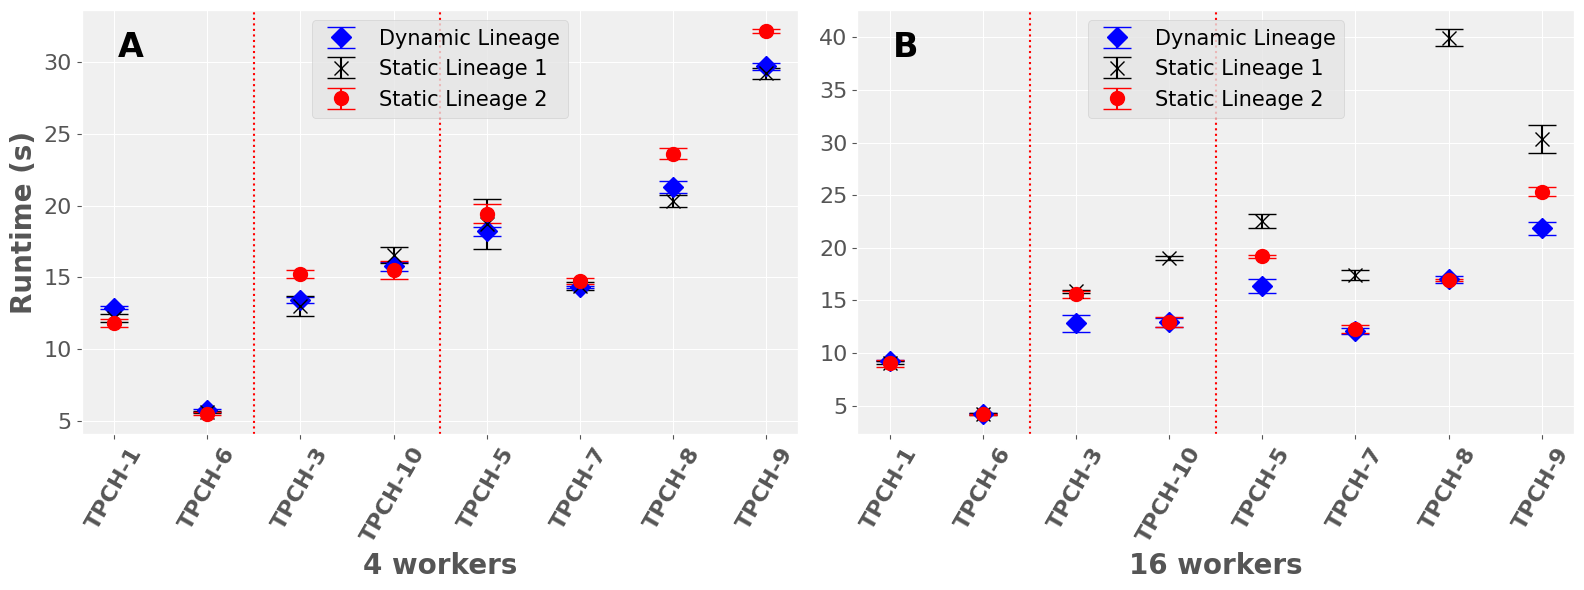

In [103]:
a = pd.read_csv("4.csv").iloc[[0,3,1,7,2,4,5,6]]

width = 0.25  # the width of the bars

fig, axes = plt.subplots(1,2, figsize=(16,6))
ax = axes[0]
ax.plot()

rects1 = ax.errorbar(x = a['TPC-H'], y = a['dynamic'], yerr = a["dynamic-std"], label = "Dynamic Lineage", fmt="D",markersize=10,  capsize=10, c = 'blue')
rects2 = ax.errorbar(x = a['TPC-H'], y = a['static-8'], yerr = a['static-8-std'], label = "Static Lineage 1", fmt="x",markersize=10,  capsize=10, c = 'black')
rects2 = ax.errorbar(x = a['TPC-H'], y = a['static-128'], yerr = a['static-128-std'], label = "Static Lineage 2", fmt="o",markersize=10,  capsize=10, c = 'red')

ax.set_ylabel('Runtime (s)', weight = 'bold', size= 20)
ax.legend(loc = 'upper center',fontsize=15)
ax.tick_params(axis='y', labelsize=16)
ax.text(0.05, 0.95, 'A', transform=ax.transAxes, fontsize=24, fontweight='bold', va='top')
ax.set_xticklabels(a['TPC-H'], rotation=60,weight = 'bold', size=16)
ax.set_xlabel("4 workers",weight = 'bold', size= 20)
# ax.set_xlim(0, 11)
ax.set_facecolor('#f0f0f0')
ax.axvline(x=1.5, color='red', linestyle=':')
ax.axvline(x=3.5, color='red', linestyle=':')

a = pd.read_csv("16.csv").iloc[[0,3,1,7,2,4,5,6]]
labels = a.query
ax = axes[1]
ax.plot()
rects1 = ax.errorbar(x = a['TPC-H'], y = a['dynamic'], yerr = a["dynamic-std"], label = "Dynamic Lineage", fmt="D",markersize=10,  capsize=10, c = 'blue')
rects2 = ax.errorbar(x = a['TPC-H'], y = a['static-8'], yerr = a['static-8-std'], label = "Static Lineage 1", fmt="x",markersize=10,  capsize=10, c = 'black')
rects2 = ax.errorbar(x = a['TPC-H'], y = a['static-128'], yerr = a['static-128-std'], label = "Static Lineage 2", fmt="o",markersize=10,  capsize=10, c = 'red')

ax.legend(loc = 'upper center',fontsize=15)
ax.tick_params(axis='y', labelsize=16)
ax.text(0.05, 0.95, 'B', transform=ax.transAxes, fontsize=24, fontweight='bold', va='top')
ax.set_xticklabels(a['TPC-H'], rotation=60,weight = 'bold', size=16)
ax.set_xlabel("16 workers",weight = 'bold', size= 20)
# ax.set_xlim(0, 11)
ax.set_facecolor('#f0f0f0')
ax.axvline(x=1.5, color='red', linestyle=':')
ax.axvline(x=3.5, color='red', linestyle=':')
fig.tight_layout()

#plt.show()
plt.savefig('dynamic-vs-static.pdf')  

/tmp/ipykernel_3942476/1515460951.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(a['Query'], rotation=60,weight = 'bold', size= 16)
/tmp/ipykernel_3942476/1515460951.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(a['Query'], rotation=60,weight = 'bold', size=16)


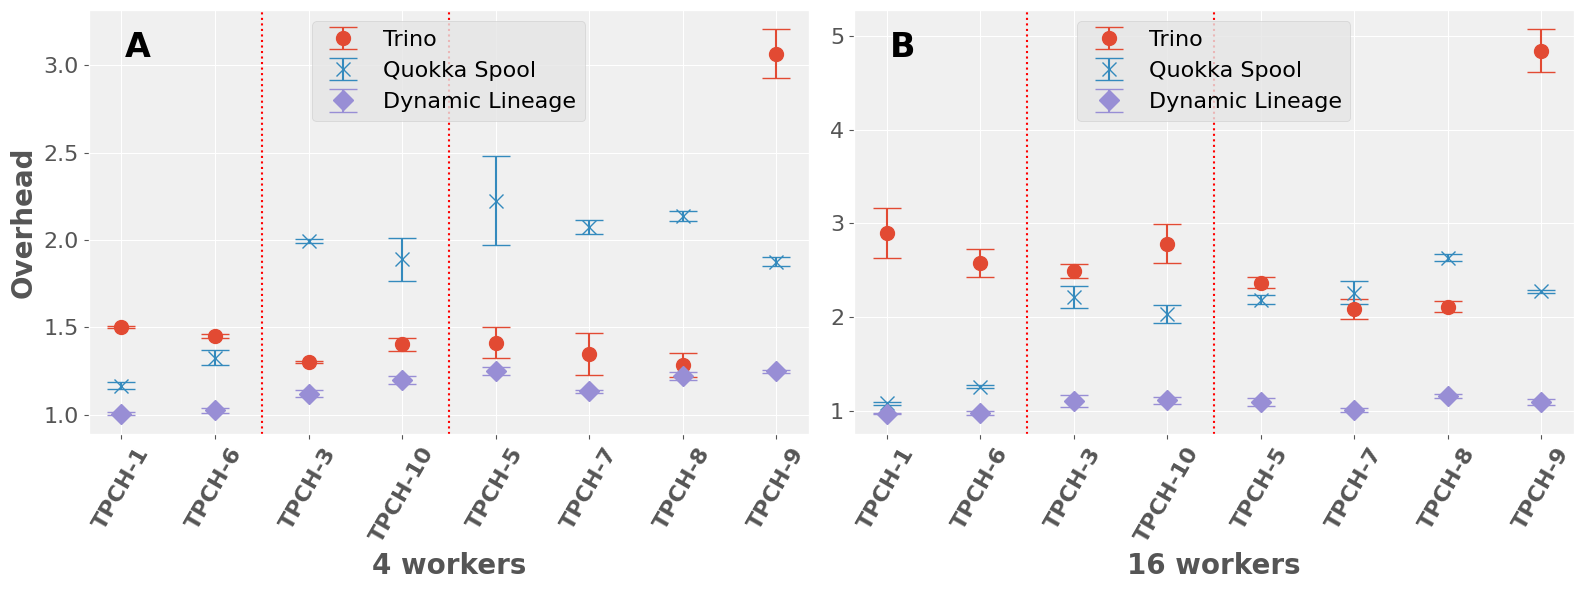

In [106]:
a = pd.read_csv("trino-results.csv",delimiter='\t').iloc[[0,5,2,9,4,6,7,8]]
b = pd.read_csv("4.csv").iloc[[0,3,1,7,2,4,5,6]]
c = pd.read_csv("16.csv").iloc[[0,3,1,7,2,4,5,6]]
from matplotlib.ticker import MultipleLocator

width = 0.25  # the width of the bars

fig, axes = plt.subplots(1,2, figsize=(16,6))
ax = axes[0]
ax.plot()
rects1 = ax.errorbar(x = a['Query'], y = a['FT-4-mean'] / a['NonFT-4-mean'], yerr = a["FT-4-std"] / a['NonFT-4-mean'], label = "Trino", fmt="o", markersize=10, capsize=10)
# rects2 = ax.errorbar(x = a['Query'], y = b[''] / a['NonFT-4-mean'], yerr = a["FT-4-std"] / a['NonFT-4-mean'], label = "Trino", fmt="o", markersize=10, capsize=10)
rects3 = ax.errorbar(x = a['Query'], y = b['spool']/  b['nonft'] , yerr = b['spool-std'] /b['nonft'], label = "Quokka Spool", fmt = "x", markersize=10, capsize = 10)
rects3 = ax.errorbar(x = a['Query'], y = b['dynamic']/  b['nonft'] , yerr = b['dynamic-std'] /b['nonft'], label = "Dynamic Lineage", fmt = "D", markersize=10, capsize = 10)

ax.set_ylabel('Overhead', weight = 'bold', size= 20)
ax.legend(fontsize=15)
ax.tick_params(axis='y', labelsize=16)
ax.set_xticklabels(a['Query'], rotation=60,weight = 'bold', size= 16)
ax.set_xlabel("4 workers",weight = 'bold', size= 20)
ax.text(0.05, 0.95, 'A', transform=ax.transAxes, fontsize=24, fontweight='bold', va='top')
ax.legend(loc = 'upper center', fontsize=16)
ax.axvline(x=1.5, color='red', linestyle=':')
ax.axvline(x=3.5, color='red', linestyle=':')

# ax.set_xlim(0, 11)
ax.set_facecolor('#f0f0f0')
labels = a.query
ax = axes[1]
ax.plot()
rects1 = ax.errorbar(x = a['Query'], y = a['FT-16-mean'] / a['NonFT-16-mean'], yerr = a["FT-16-std"] / a['NonFT-16-mean'], label = "Trino", fmt="o",markersize=10,  capsize=10)
rects3 = ax.errorbar(x = a['Query'], y = c['spool']/  c['nonft'] , yerr = c['spool-std'] /c['nonft'], label = "Quokka Spool", fmt = "x", markersize=10, capsize = 10)
rects3 = ax.errorbar(x = a['Query'], y = c['dynamic']/  c['nonft'] , yerr = c['dynamic-std'] /c['nonft'], label = "Dynamic Lineage", fmt = "D", markersize=10, capsize = 10)

ax.legend(loc = 'upper center', fontsize=16)

ax.set_xticklabels(a['Query'], rotation=60,weight = 'bold', size=16)
ax.tick_params(axis='y', labelsize=16)
ax.text(0.05, 0.95, 'B', transform=ax.transAxes, fontsize=24, fontweight='bold', va='top')

ax.set_xlabel("16 workers",weight = 'bold', size= 20)
# ax.set_xlim(0,11)
ax.set_facecolor('#f0f0f0')
ax.axvline(x=1.5, color='red', linestyle=':')
ax.axvline(x=3.5, color='red', linestyle=':')
fig.tight_layout()

#plt.show()
plt.savefig('spool-overhead.pdf')  

In [99]:
import pandas as pd
from scipy.stats import gmean

a = pd.read_csv("ft-results.csv")
gmean( (a['ft-overhead'] ) / a['spark-ft-overhead'])

0.9905280938958432

/tmp/ipykernel_3942476/1877499943.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(a['TPC-H'], rotation=60,weight = 'bold', size= 16)
/tmp/ipykernel_3942476/1877499943.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, weight = 'bold', size = 16)


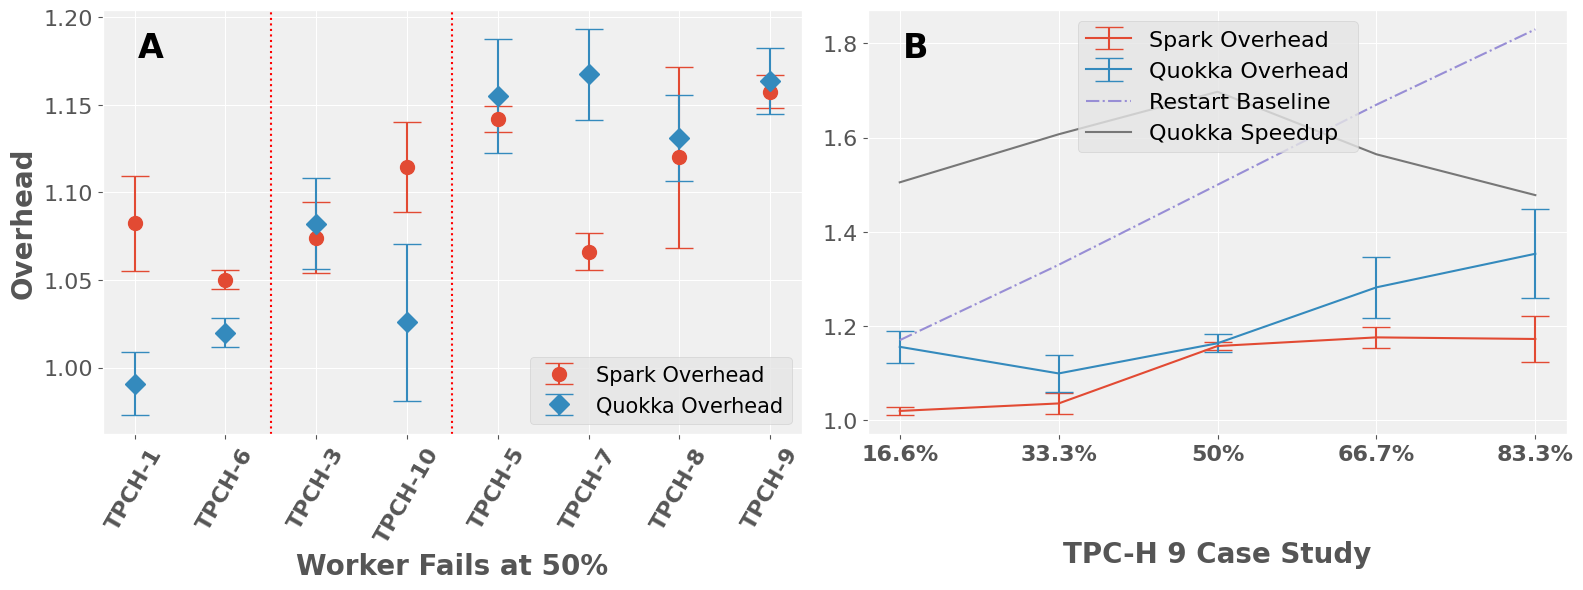

In [96]:
a = pd.read_csv("ft-results.csv").iloc[[0,3,1,7,2,4,5,6]]
from matplotlib.ticker import MultipleLocator

width = 0.25  # the width of the bars

fig, axes = plt.subplots(1,2, figsize=(16,6))

ax = axes[0]
ax.plot()
rects1 = ax.errorbar(x = a['TPC-H'], y = a['spark-ft-overhead'], yerr = a["spark-ft-overhead-std"], label = "Spark Overhead", fmt="o", markersize=10, capsize=10)
rects2 = ax.errorbar(x = a['TPC-H'], y = a['ft-overhead'], yerr = a['ft-overhead-std'], label = "Quokka Overhead", fmt="D",markersize=10,  capsize=10)
ax.legend(fontsize=15,loc = 'lower right')
ax.set_ylabel('Overhead', weight = 'bold', size= 20)
ax.tick_params(axis='y', labelsize=16)
ax.set_xticklabels(a['TPC-H'], rotation=60,weight = 'bold', size= 16)
ax.set_xlabel("Worker Fails at 50%",weight = 'bold', size= 20)
ax.text(0.05, 0.95, 'A', transform=ax.transAxes, fontsize=24, fontweight='bold', va='top')

# ax.set_xlim(0,11)
ax.set_facecolor('#f0f0f0')
ax.axvline(x=1.5, color='red', linestyle=':')
ax.axvline(x=3.5, color='red', linestyle=':')
labels = ['16.6%','33.3%','50%','66.7%','83.3%']

a = pd.read_csv("case-study-results.csv")
ax = axes[1]
ax.plot()
rects1 = ax.errorbar(x = labels , y = a['spark-16-overhead-mean'] + 1, yerr = a["spark-16-overhead-std"], label = "Spark Overhead", markersize=10, capsize=10)
rects2 = ax.errorbar(x = labels , y = a['ft-overhead'] + 1, yerr = a['ft-overhead-std'], label = "Quokka Overhead", markersize=10,  capsize=10)
rects2 = ax.errorbar(x = labels , y = [1.17, 1.33, 1.5, 1.67, 1.83], label = "Restart Baseline", markersize=10,  capsize=10, ls='-.')
rects2 = ax.errorbar(x = labels , y = a['spark-16-runtime'] / a['ft-runtime'], label = "Quokka Speedup", markersize=10,  capsize=10)

ax.legend(fontsize=15)
ax.tick_params(axis='y', labelsize=16)
ax.set_xticklabels(labels, weight = 'bold', size = 16)
ax.set_xlabel("TPC-H 9 Case Study",weight = 'bold', size= 20)
ax.xaxis.set_label_coords(0.5, -0.25)
ax.text(0.05, 0.95, 'B', transform=ax.transAxes, fontsize=24, fontweight='bold', va='top')
ax.legend(loc = 'upper center', fontsize=16)
# ax.set_xlim(0, 11)
ax.set_facecolor('#f0f0f0')

fig.tight_layout()

#plt.show()
plt.savefig('spark-vs-quokka-recover.pdf')  